# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API request by city name

# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_with_data = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    # Only include cities with comprehensive weather data
    try:
        query_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_with_data.append(response['name'])
        city_id = response['id']
        print(f'Processing {cities.index(city)+1} of {len(cities)} | id: {city_id} | {city}')
    except KeyError:
        print('City data not found')

Processing 1 of 626 | id: 371745 | kutum
Processing 2 of 626 | id: 3466704 | castro
Processing 3 of 626 | id: 5855927 | hilo
Processing 4 of 626 | id: 2075265 | busselton
Processing 5 of 626 | id: 4035715 | avarua
Processing 6 of 626 | id: 4030556 | rikitea
Processing 7 of 626 | id: 5122534 | jamestown
Processing 8 of 626 | id: 964432 | port alfred
Processing 9 of 626 | id: 3393692 | itarema
Processing 10 of 626 | id: 1735106 | georgetown
Processing 11 of 626 | id: 3421765 | nanortalik
Processing 12 of 626 | id: 6201424 | mataura
Processing 13 of 626 | id: 2019867 | mokhsogollokh
Processing 14 of 626 | id: 132144 | hamadan
Processing 15 of 626 | id: 2638419 | scarborough
Processing 16 of 626 | id: 2152659 | port macquarie
Processing 17 of 626 | id: 4020109 | atuona
Processing 18 of 626 | id: 934649 | cap malheureux
Processing 19 of 626 | id: 3119979 | la baneza
Processing 20 of 626 | id: 6111862 | port hardy
Processing 21 of 626 | id: 4032243 | vaini
Processing 22 of 626 | id: 3922037 

Processing 185 of 626 | id: 2449066 | tombouctou
City data not found
Processing 187 of 626 | id: 5563839 | fortuna
Processing 188 of 626 | id: 3831208 | qaanaaq
Processing 189 of 626 | id: 6089245 | norman wells
Processing 190 of 626 | id: 2122389 | ossora
Processing 191 of 626 | id: 2112309 | katsuura
Processing 192 of 626 | id: 986717 | kruisfontein
Processing 193 of 626 | id: 1850523 | tateyama
Processing 194 of 626 | id: 3445026 | vila velha
Processing 195 of 626 | id: 1497210 | novoagansk
Processing 196 of 626 | id: 5030005 | hibbing
Processing 197 of 626 | id: 81604 | suluq
Processing 198 of 626 | id: 1636308 | manokwari
Processing 199 of 626 | id: 6078372 | moose factory
Processing 200 of 626 | id: 1179463 | dunga bunga
City data not found
Processing 202 of 626 | id: 3457147 | mineiros
Processing 203 of 626 | id: 962367 | richards bay
Processing 204 of 626 | id: 2178753 | kirakira
Processing 205 of 626 | id: 1249931 | beruwala
City data not found
Processing 207 of 626 | id: 2137

Processing 372 of 626 | id: 2963155 | kinsale
Processing 373 of 626 | id: 1510377 | belyy yar
Processing 374 of 626 | id: 2158767 | mareeba
Processing 375 of 626 | id: 3904906 | santa cruz
Processing 376 of 626 | id: 3458591 | lima duarte
Processing 377 of 626 | id: 5710035 | west wendover
Processing 378 of 626 | id: 1610187 | kaset sombun
Processing 379 of 626 | id: 2015179 | tommot
Processing 380 of 626 | id: 3579925 | saint-georges
Processing 381 of 626 | id: 1650434 | bambanglipuro
Processing 382 of 626 | id: 711390 | brovary
Processing 383 of 626 | id: 2510573 | teguise
Processing 384 of 626 | id: 2312895 | mbandaka
Processing 385 of 626 | id: 3412093 | vestmannaeyjar
Processing 386 of 626 | id: 3386931 | tamandare
Processing 387 of 626 | id: 2522890 | tortoli
Processing 388 of 626 | id: 2518878 | denia
Processing 389 of 626 | id: 1490591 | suslovo
Processing 390 of 626 | id: 686090 | asau
Processing 391 of 626 | id: 2027296 | aykhal
City data not found
City data not found
Process

City data not found
Processing 555 of 626 | id: 1526041 | atasu
Processing 556 of 626 | id: 174448 | abu kamal
Processing 557 of 626 | id: 1274989 | candolim
Processing 558 of 626 | id: 3038333 | ajaccio
Processing 559 of 626 | id: 762199 | pionki
Processing 560 of 626 | id: 3694112 | paita
Processing 561 of 626 | id: 3981432 | todos santos
Processing 562 of 626 | id: 2400578 | fougamou
Processing 563 of 626 | id: 2015852 | svetlaya
Processing 564 of 626 | id: 697692 | peremyshlyany
Processing 565 of 626 | id: 2180815 | tuatapere
Processing 566 of 626 | id: 2387546 | bozoum
Processing 567 of 626 | id: 152663 | mugumu
City data not found
Processing 569 of 626 | id: 609924 | emba
Processing 570 of 626 | id: 2643044 | margate
Processing 571 of 626 | id: 779622 | havoysund
Processing 572 of 626 | id: 3870282 | talcahuano
Processing 573 of 626 | id: 1280037 | shache
Processing 574 of 626 | id: 2063039 | port keats
City data not found
Processing 576 of 626 | id: 2120400 | tungor
Processing 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from lists
weather_dict = {
    "City": city_with_data,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kutum,14.2000,24.6667,82.47,20,23,6.91,SD,1666200986
1,Castro,-24.7911,-50.0119,73.36,71,36,6.42,BR,1666200987
2,Hilo,19.7297,-155.0900,80.28,82,100,4.61,US,1666200987
3,Busselton,-33.6500,115.3333,57.85,88,29,5.77,AU,1666200988
4,Avarua,-21.2078,-159.7750,73.45,78,75,9.22,CK,1666200988


In [5]:
# Save Data to csv
weather_data.to_csv("output_data/weather_data.csv")

In [6]:
# Print dataframe summary statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.218962,21.736537,60.591469,70.772727,60.279720,8.789126,1.666201e+09
std,34.063202,89.440517,20.188066,21.773570,37.298842,6.165221,1.268867e+02
min,-54.800000,-175.200000,-8.280000,10.000000,0.000000,0.000000,1.666200e+09
25%,-7.960850,-55.382750,44.600000,61.000000,24.000000,4.307500,1.666201e+09
50%,27.996950,24.610350,64.275000,77.000000,71.000000,7.560000,1.666201e+09
75%,50.549900,99.168250,76.755000,88.000000,99.000000,11.740000,1.666201e+09
max,78.218600,179.316700,102.420000,100.000000,100.000000,34.520000,1.666201e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humid_cities = weather_data.loc[weather_data['Humidity'] > 100]
humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.

print('There are no cities with humidity over 100%')

There are no cities with humidity over 100%


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.copy()
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kutum,14.2000,24.6667,82.47,20,23,6.91,SD,1666200986
1,Castro,-24.7911,-50.0119,73.36,71,36,6.42,BR,1666200987
2,Hilo,19.7297,-155.0900,80.28,82,100,4.61,US,1666200987
3,Busselton,-33.6500,115.3333,57.85,88,29,5.77,AU,1666200988
4,Avarua,-21.2078,-159.7750,73.45,78,75,9.22,CK,1666200988


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

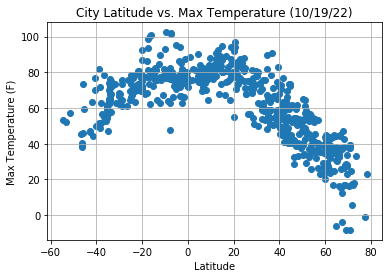

In [11]:
# Build a scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10/19/22)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Temperatures seem to be at their highest near the equator and they drop off as you move farther away from the equator. The northern hemisphere has the coldest temperatures.

## Latitude vs. Humidity Plot

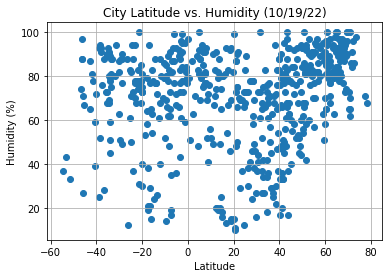

In [12]:
# Build a scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10/19/22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The chart does not clearly indicate a correlation between latitude and humidity. The southern hemisphere appears to have a much more even distribution of humidity, but the northern hemisphere hints at higher humidities as you move farther away from the equator. 

## Latitude vs. Cloudiness Plot

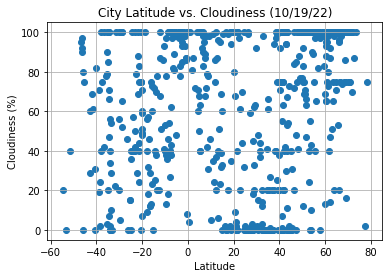

In [13]:
# Build a scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10/19/22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

There is little correlation between cloudiness and latitude. It appears that the rate of cloudiness is not affected by a city's latitude.

## Latitude vs. Wind Speed Plot

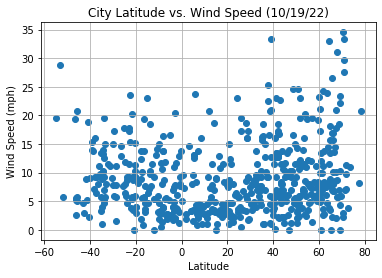

In [14]:
# Build a scatter plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10/19/22)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Similar to cloudiness, there is little correlation between wind speed and latitude. It is rare to have wind speeds greater than 15mph but the closer to the norther hemisphere you go, the higher the wind speeds you encounter from an outlier perspective.

## Linear Regression

In [24]:
# Dataframe with cities in northern hemisphere
northern_cities = clean_city_data.loc[clean_city_data['Lat'] >= 0]
northern_cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,3.880000e+02
mean,41.157815,15.651904,55.267113,70.819588,60.659794,8.909330,1.666201e+09
std,19.644354,85.772056,21.069599,22.176027,39.103754,6.509269,1.301183e+02
min,0.048700,-173.300000,-8.280000,10.000000,0.000000,0.000000,1.666200e+09
25%,26.173900,-56.778725,39.140000,59.500000,20.000000,4.307500,1.666201e+09
50%,42.823800,20.856200,54.275000,77.000000,75.000000,7.400000,1.666201e+09
75%,58.089100,86.439350,74.107500,88.000000,100.000000,11.757500,1.666201e+09
max,78.218600,179.316700,97.180000,100.000000,100.000000,34.520000,1.666201e+09


In [25]:
# Dataframe with cities in southern hemisphere
southern_cities = clean_city_data.loc[clean_city_data['Lat'] < 0]
southern_cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,-20.826010,34.567176,71.818913,70.673913,59.478261,8.535652,1.666201e+09
std,13.563217,95.700463,12.083938,20.958512,33.260022,5.375941,1.200272e+02
min,-54.800000,-175.200000,38.350000,12.000000,0.000000,0.000000,1.666201e+09
25%,-33.661775,-54.408875,64.690000,62.750000,35.500000,4.457500,1.666201e+09
50%,-20.243300,28.489600,73.310000,77.000000,60.500000,7.840000,1.666201e+09
75%,-8.714400,134.529150,78.580000,87.000000,93.000000,11.590000,1.666201e+09
max,-0.358200,176.350000,102.420000,100.000000,100.000000,28.770000,1.666201e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.867844432312026


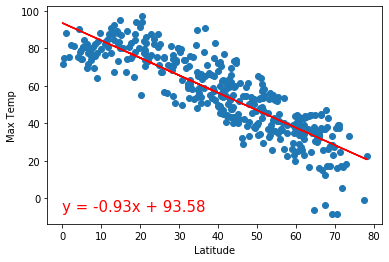

In [41]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = northern_cities['Lat']
y_values = northern_cities['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-7),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("output_data/Fig5.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a strong negative correlation between temperature and latitude. Essentially, as you move farther away from the equator, temperatures decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6246794444932112


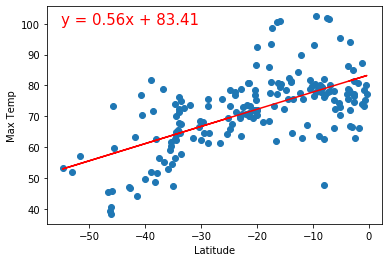

In [42]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = southern_cities['Lat']
y_values = southern_cities['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("output_data/Fig6.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a moderate positive correlation between temperature and latitude in the southern hemisphere. The linear regression implies that temperatures increase as you move closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3356062908867169


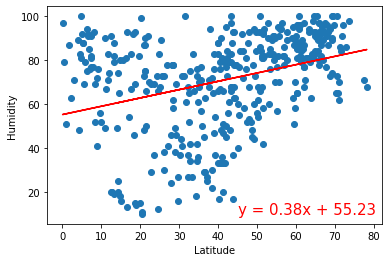

In [43]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = northern_cities['Lat']
y_values = northern_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig7.png")

print(f"The r-value is: {rvalue}")
plt.show()

The linear regression suggests a weak positive correlation between humidity and latitude in the northern hemisphere. Cities that are located farther away from the equator are more humid than those located closer to the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04302034558703187


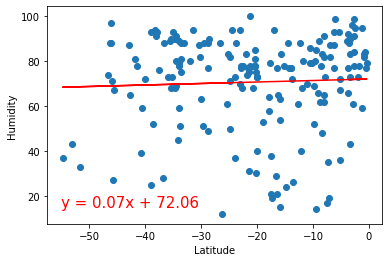

In [46]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = southern_cities['Lat']
y_values = southern_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig8.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a very weak correlation between humidity and latitude for cities located in the southern hemisphere. Given that there is virtually no correlation, we cannot make any inferences about humidity tendencies for these cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3006202294336813


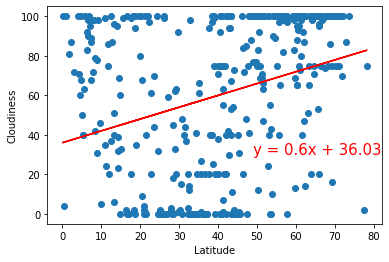

In [49]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = northern_cities['Lat']
y_values = northern_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(49,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig9.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a weak positive correlation between cloudiness and cities located in the northern hemisphere. The regression indicates that cloudiness increases as you move farther away from the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3002492722283889


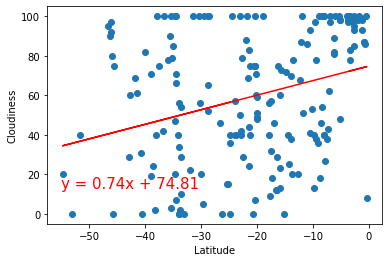

In [51]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = southern_cities['Lat']
y_values = southern_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig10.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a weak positive correlation between cloudiness and cities location in the southern hemisphere. Unlike the northern hemisphere regression, cloudiness tends to increase as you move closer to the equator for cities located in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.256305089384976


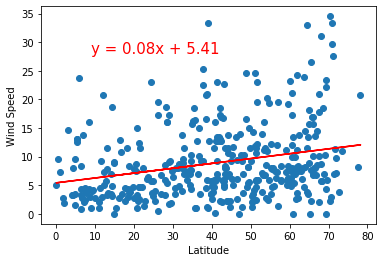

In [55]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = northern_cities['Lat']
y_values = northern_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig11.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a very weak correlation between wind speed and latitude for cities in the northern hemisphere. The inference is that wind speeds tend to increase as you move farther away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.26463926408131866


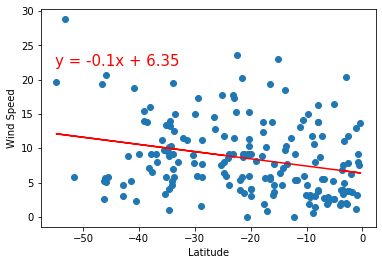

In [57]:
# Create scatter plot and add the linear regression equation and line to plot
x_values = southern_cities['Lat']
y_values = southern_cities['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig12.png")

print(f"The r-value is: {rvalue}")
plt.show()

There is a very weak correlation between wind speeds and latitude for cities located in the southern hemisphere. In this case, wind speeds tend to drop as you move closer to the equator.